In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
train=pd.read_csv("sales_train.csv")


In [4]:
sample=pd.read_csv("sample_submission.csv")


In [5]:
test=pd.read_csv("test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
train.drop(["date_block_num"],axis=1,inplace=True)

In [8]:
train["date"]=pd.to_datetime(train["date"],infer_datetime_format=True)

In [9]:
train=train.set_index(['date'])

In [10]:
train=train[['item_cnt_day','shop_id', 'item_id', 'item_price']]

In [11]:
train.head()

,item_cnt_day,shop_id,item_id,item_price
date,,,,
2013-02-01,1.0,59,22154,999.00
2013-03-01,1.0,25,2552,899.00
2013-05-01,-1.0,25,2552,899.00
2013-06-01,1.0,25,2554,1709.05
2013-01-15,1.0,25,2555,1099.00


In [12]:
rcParams['figure.figsize']=10,6

Text(0.5, 0, 'item_cnt_day')

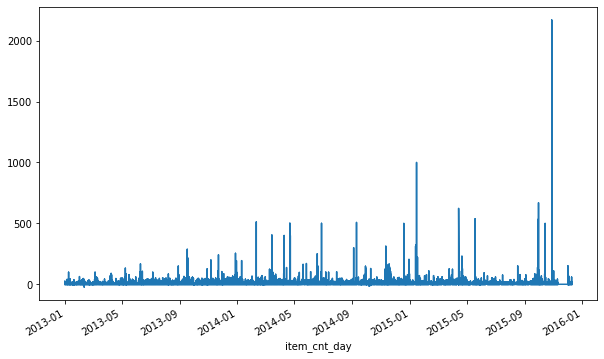

In [13]:
train["item_cnt_day"].plot()
plt.xlabel("item_cnt_day")

In [15]:
tr=train

In [16]:
j=1
a=['item_cnt_day', 'shop_id', 'item_id', 'item_price']
for i in a:
    tr[i+str(j)]=tr[i].shift(-1)
    

In [17]:
tr

,item_cnt_day,shop_id,item_id,item_price,item_cnt_day1,shop_id1,item_id1,item_price1
date,,,,,,,,
2013-02-01,1.0,59,22154,999.00,1.0,25.0,2552.0,899.00
2013-03-01,1.0,25,2552,899.00,-1.0,25.0,2552.0,899.00
2013-05-01,-1.0,25,2552,899.00,1.0,25.0,2554.0,1709.05
2013-06-01,1.0,25,2554,1709.05,1.0,25.0,2555.0,1099.00
2013-01-15,1.0,25,2555,1099.00,1.0,25.0,2564.0,349.00
...,...,...,...,...,...,...,...,...
2015-10-10,1.0,25,7409,299.00,1.0,25.0,7460.0,299.00
2015-09-10,1.0,25,7460,299.00,1.0,25.0,7459.0,349.00
2015-10-14,1.0,25,7459,349.00,1.0,25.0,7440.0,299.00


In [18]:
tr.drop(["item_cnt_day","shop_id1","item_id1","item_price1"],axis=1,inplace=True)

In [19]:
tr

,shop_id,item_id,item_price,item_cnt_day1
date,,,,
2013-02-01,59,22154,999.00,1.0
2013-03-01,25,2552,899.00,-1.0
2013-05-01,25,2552,899.00,1.0
2013-06-01,25,2554,1709.05,1.0
2013-01-15,25,2555,1099.00,1.0
...,...,...,...,...
2015-10-10,25,7409,299.00,1.0
2015-09-10,25,7460,299.00,1.0
2015-10-14,25,7459,349.00,1.0


In [20]:
tr.fillna(method='ffill',inplace=True)

In [21]:
tr

,shop_id,item_id,item_price,item_cnt_day1
date,,,,
2013-02-01,59,22154,999.00,1.0
2013-03-01,25,2552,899.00,-1.0
2013-05-01,25,2552,899.00,1.0
2013-06-01,25,2554,1709.05,1.0
2013-01-15,25,2555,1099.00,1.0
...,...,...,...,...
2015-10-10,25,7409,299.00,1.0
2015-09-10,25,7460,299.00,1.0
2015-10-14,25,7459,349.00,1.0


In [22]:
yy=tr["item_cnt_day1"].values

In [23]:
yy = yy.reshape((len(yy), 1))

In [24]:
tr.drop(["item_cnt_day1"],axis=1,inplace=True)

In [25]:
scale=MinMaxScaler()
scale=scale.fit(tr)
w=scale.transform(tr)

In [26]:
scaler=scale.fit(yy)
qq=scaler.transform(yy)

In [27]:
qq

array([[0.01049749],
       [0.00958466],
       [0.01049749],
       ...,
       [0.01049749],
       [0.01049749],
       [0.01049749]])

In [28]:
www=w

In [29]:
xtrain,xtest,ytrain,ytest=www[:2348680,0:3],www[2348680:,0:3],qq[:2348680,-1],qq[2348680:,-1]

In [30]:
xtest

array([[0.3559322 , 0.3812531 , 0.00971164],
       [0.3559322 , 0.3812531 , 0.00971164],
       [0.3559322 , 0.3812531 , 0.00971164],
       ...,
       [0.42372881, 0.33646082, 0.00113643],
       [0.42372881, 0.33560377, 0.00097409],
       [0.42372881, 0.33650593, 0.00097409]])

In [31]:
ytest

array([0.01049749, 0.01049749, 0.01049749, ..., 0.01049749, 0.01049749,
       0.01049749])

In [32]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [34]:
model=Sequential()
model.add(LSTM(100,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=30000,verbose=2)

Epoch 1/5
79/79 - 314s - loss: 5.4026e-06 - val_loss: 3.5839e-06
Epoch 2/5
79/79 - 310s - loss: 8.9742e-07 - val_loss: 3.5835e-06
Epoch 3/5
79/79 - 309s - loss: 8.9579e-07 - val_loss: 3.5835e-06
Epoch 4/5
79/79 - 309s - loss: 8.9472e-07 - val_loss: 3.5840e-06
Epoch 5/5
79/79 - 309s - loss: 8.9373e-07 - val_loss: 3.5837e-06


In [36]:
ypred=model.predict(xtest)

In [37]:
ypred[:5]

array([[0.01058801],
       [0.01058801],
       [0.01058801],
       [0.01058802],
       [0.01058802]], dtype=float32)

In [38]:
ypred=scaler.inverse_transform(ypred)

we our using above scaler to transfrom to denormalize ypred

In [39]:
ypred

array([[1.1983397],
       [1.1983397],
       [1.1983397],
       ...,
       [1.2002578],
       [1.2002414],
       [1.200262 ]], dtype=float32)

In [40]:
ytest = ytest.reshape((len(ytest), 1))

Converting 1d data to 2d

In [41]:
y_test = scaler.inverse_transform(ytest)

In [42]:
y_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [43]:
np.sqrt(mean_squared_error(y_test,ypred))

4.147737562500817

In [44]:
y_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [45]:
ypred[:5]

array([[1.1983397],
       [1.1983397],
       [1.1983397],
       [1.1983438],
       [1.1983438]], dtype=float32)

In [46]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [47]:
train

,shop_id,item_id,item_price
date,,,
2013-02-01,59,22154,999.00
2013-03-01,25,2552,899.00
2013-05-01,25,2552,899.00
2013-06-01,25,2554,1709.05
2013-01-15,25,2555,1099.00
...,...,...,...
2015-10-10,25,7409,299.00
2015-09-10,25,7460,299.00
2015-10-14,25,7459,349.00


In [48]:
train=train[['item_price','shop_id', 'item_id']]

In [49]:
trr=train

In [50]:
j=1
a=['item_price','shop_id', 'item_id']
for i in a:
    trr[i+str(j)]=trr[i].shift(-1)
    

<ipython-input-50-4464cbc4fa89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trr[i+str(j)]=trr[i].shift(-1)


In [51]:
trr

,item_price,shop_id,item_id,item_price1,shop_id1,item_id1
date,,,,,,
2013-02-01,999.00,59,22154,899.00,25.0,2552.0
2013-03-01,899.00,25,2552,899.00,25.0,2552.0
2013-05-01,899.00,25,2552,1709.05,25.0,2554.0
2013-06-01,1709.05,25,2554,1099.00,25.0,2555.0
2013-01-15,1099.00,25,2555,349.00,25.0,2564.0
...,...,...,...,...,...,...
2015-10-10,299.00,25,7409,299.00,25.0,7460.0
2015-09-10,299.00,25,7460,349.00,25.0,7459.0
2015-10-14,349.00,25,7459,299.00,25.0,7440.0


In [52]:
trr.drop(["shop_id1","item_id1","item_price"],axis=1,inplace=True)

In [53]:
trr.fillna(method='ffill',inplace=True)

In [54]:
yyy=trr["item_price1"].values
trr.drop(["item_price1"],axis=1,inplace=True)

In [55]:
yyy=yyy.reshape(len(yyy),1)

In [56]:
yyy

array([[ 899.  ],
       [ 899.  ],
       [1709.05],
       ...,
       [ 299.  ],
       [ 299.  ],
       [ 299.  ]])

In [57]:
trr

,shop_id,item_id
date,,
2013-02-01,59,22154
2013-03-01,25,2552
2013-05-01,25,2552
2013-06-01,25,2554
2013-01-15,25,2555
...,...,...
2015-10-10,25,7409
2015-09-10,25,7460
2015-10-14,25,7459


In [58]:
scale=MinMaxScaler()
scale=scale.fit(trr)
w=scale.transform(trr)

In [59]:
www=w

In [60]:
yyy

array([[ 899.  ],
       [ 899.  ],
       [1709.05],
       ...,
       [ 299.  ],
       [ 299.  ],
       [ 299.  ]])

In [61]:
scalerr=scale.fit(yyy)
wewe=scalerr.transform(yyy)

In [62]:
xtrain,xtest,ytrain,ytest=www[:2348680,0:2],www[2348680:,0:2],wewe[:2348680,-1],wewe[2348680:,-1]

In [63]:
xtes=xtest

In [64]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [65]:
modelt=Sequential()
modelt.add(LSTM(100,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2])))
modelt.add(Dropout(0.1))
modelt.add(LSTM(100,activation="relu",return_sequences=True))
modelt.add(Dropout(0.1))
modelt.add(LSTM(100,activation="relu",return_sequences=True))
modelt.add(Dropout(0.1))
modelt.add(LSTM(100,activation="relu",return_sequences=True))
modelt.add(Dropout(0.1))
modelt.add(LSTM(50,activation="relu"))
modelt.add(Dense(1))
modelt.compile(optimizer='adam', loss='mse')

In [66]:
modelt.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=30000,verbose=2)

Epoch 1/5
79/79 - 205s - loss: 2.9317e-05 - val_loss: 4.1173e-05
Epoch 2/5
79/79 - 204s - loss: 2.9159e-05 - val_loss: 4.1312e-05
Epoch 3/5
79/79 - 205s - loss: 2.9160e-05 - val_loss: 4.1088e-05
Epoch 4/5
79/79 - 206s - loss: 2.9157e-05 - val_loss: 4.1310e-05
Epoch 5/5
79/79 - 205s - loss: 2.9161e-05 - val_loss: 4.1201e-05


In [67]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [68]:
test.drop(["ID"],axis=1,inplace=True)

In [69]:
te=test

In [70]:
scalll=scale.fit(test.values)
w=scalll.transform(test.values)

In [71]:
w

array([[0.05263158, 0.22618241],
       [0.05263158, 0.23896644],
       [0.05263158, 0.23503636],
       ...,
       [0.75438596, 0.71043954],
       [0.75438596, 0.88620861],
       [0.75438596, 0.04241767]])

In [72]:
w=w.reshape(w.shape[0], w.shape[1], 1)

In [73]:
y_pred=modelt.predict(w)

In [74]:
y_pred

array([[0.00276291],
       [0.00276288],
       [0.00276289],
       ...,
       [0.00275768],
       [0.00275737],
       [0.00275885]], dtype=float32)

In [75]:
scalerr=scale.fit(yyy)
wewe=scalerr.transform(yyy)

In [76]:
y_pred=scalerr.inverse_transform(y_pred)

In [77]:
y_pred

array([[849.92255],
       [849.9158 ],
       [849.91785],
       ...,
       [848.3134 ],
       [848.2183 ],
       [848.6723 ]], dtype=float32)

In [78]:
test

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648


In [79]:
len(y_pred)

214200

In [80]:
test["wewe"]=y_pred

In [81]:
test

,shop_id,item_id,wewe
0,5,5037,849.922546
1,5,5320,849.915771
2,5,5233,849.917847
3,5,5232,849.917847
4,5,5268,849.916992
...,...,...,...
214195,45,18454,848.247498
214196,45,16188,848.302856
214197,45,15757,848.313416
214198,45,19648,848.218323


In [82]:
scalert=scale.fit(test.values)
wewe=scalert.transform(test.values)

In [83]:
wewe

array([[0.05263158, 0.22618241, 0.95211115],
       [0.05263158, 0.23896644, 0.94923937],
       [0.05263158, 0.23503636, 0.95011901],
       ...,
       [0.75438596, 0.71043954, 0.27002484],
       [0.75438596, 0.88620861, 0.22971644],
       [0.75438596, 0.04241767, 0.42215151]])

In [84]:
y_prrr=wewe.reshape(wewe.shape[0], wewe.shape[1], 1)

In [85]:
y_predict=model.predict(y_prrr)

In [86]:
y_predict

array([[0.01058439],
       [0.01058448],
       [0.01058445],
       ...,
       [0.01060104],
       [0.01060315],
       [0.01059425]], dtype=float32)

In [87]:
scaler=scale.fit(yy)
qq=scaler.transform(yy)

In [88]:
y_predict=scaler.inverse_transform(y_predict)

In [89]:
y_predict

array([[1.190404 ],
       [1.190598 ],
       [1.1905388],
       ...,
       [1.2268846],
       [1.2315024],
       [1.2119908]], dtype=float32)

In [91]:
submission=pd.read_csv("sample_submission.csv")

In [92]:
submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [93]:
pred=y_predict.flatten()

In [94]:
for i in range(214200):
    pred[i]=round(pred[i])

In [95]:
pred

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [96]:
r = pd.Series(pred,name="item_cnt_month")

In [97]:
submiss = pd.concat([pd.Series(range(0,214200),name = "ID"),r],axis = 1)

In [98]:
submiss

,ID,item_cnt_month
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
214195,214195,1.0
214196,214196,1.0
214197,214197,1.0
214198,214198,1.0


In [99]:
submiss.to_csv("submit.csv",index=False)